In [4]:
import numpy as np
import pyogrio
import geopandas as gpd
from tqdm import tqdm
import matplotlib.pyplot as plt

geopackage_path = "C:/Users/eleonore.kong/Documents/InSAR/DATA/grid_stats_agg.gpkg"
# layer = 'grid_500m_filter_01'
grid_to_process = 'grid_500m_enrichi'
output = "C:/Users/eleonore.kong/Documents/InSAR/DATA/"

In [23]:
gdf = pyogrio.read_dataframe(geopackage_path, layer=grid_to_process)
gdf['NIVEAU'] = np.round(gdf['NIVEAU'], 0)
# gdf = 

gdf

,grid_500m,Detrended Amplitude_median,Detrended Amplitude_2016_median,Detrended Amplitude_2017_median,Detrended Amplitude_2018_median,Detrended Amplitude_2019_median,Detrended Amplitude_2020_median,Detrended Amplitude_2021_median,Detrended Amplitude_winter_2015_median,Detrended Amplitude_summer_2016_median,...,summer_mean_swi_2020,summer_mean_swi_2021,winter_summer_swi_diff,winter_summer_swi_diff_2016,winter_summer_swi_diff_2017,winter_summer_swi_diff_2018,winter_summer_swi_diff_2019,winter_summer_swi_diff_2020,winter_summer_swi_diff_2021,geometry
0,45621.0,0.255381,0.328600,0.476533,0.068183,0.169258,0.312624,0.626827,0.060258,0.596942,...,1.149417,1.092417,0.250086,0.149017,0.042983,0.112817,0.067617,0.203983,0.193583,"POLYGON ((108999.292 6839978.800, 109143.630 6..."
1,47576.0,0.217001,0.324344,0.430039,0.311579,0.408984,0.192081,0.629785,0.447942,0.200746,...,1.149417,1.092417,0.250086,0.149017,0.042983,0.112817,0.067617,0.203983,0.193583,"POLYGON ((109432.305 6842728.800, 109576.643 6..."
2,47577.0,0.141937,0.696614,0.402353,0.489326,0.322141,0.432796,0.423263,0.813389,0.579838,...,1.149417,1.092417,0.250086,0.149017,0.042983,0.112817,0.067617,0.203983,0.193583,"POLYGON ((109432.305 6842228.800, 109576.643 6..."
3,49535.0,0.199435,0.502142,0.360037,0.381954,0.294615,0.582396,0.555767,0.484717,0.400663,...,1.149417,1.092417,0.250086,0.149017,0.042983,0.112817,0.067617,0.203983,0.193583,"POLYGON ((109865.318 6842978.800, 110009.655 6..."
4,49536.0,0.188056,0.340883,0.259405,0.338274,0.358470,0.322529,0.390644,0.469405,0.157233,...,1.149417,1.092417,0.250086,0.149017,0.042983,0.112817,0.067617,0.203983,0.193583,"POLYGON ((109865.318 6842478.800, 110009.655 6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411428,4455520.0,0.209431,0.557240,0.728693,0.632542,0.378329,0.598752,0.637969,0.750545,0.538536,...,0.559333,0.663417,0.417893,0.048117,0.105650,0.366100,0.005917,0.314667,0.128783,"POLYGON ((1083277.872 6890478.800, 1083422.209..."
1411429,4455521.0,0.305035,0.574204,0.349124,0.474502,0.554821,0.459481,0.507138,0.646525,0.365291,...,0.559333,0.663417,0.417893,0.048117,0.105650,0.366100,0.005917,0.314667,0.128783,"POLYGON ((1083277.872 6889978.800, 1083422.209..."
1411430,4455522.0,0.111001,0.186615,0.182399,0.155454,0.142767,0.136855,0.146319,0.208066,0.203040,...,0.559333,0.663417,0.417893,0.048117,0.105650,0.366100,0.005917,0.314667,0.128783,"POLYGON ((1083277.872 6889478.800, 1083422.209..."
1411431,4455523.0,0.079936,0.269319,0.234388,0.238611,0.196203,0.218753,0.251116,0.313471,0.225167,...,0.559333,0.663417,0.417893,0.048117,0.105650,0.366100,0.005917,0.314667,0.128783,"POLYGON ((1083277.872 6888978.800, 1083422.209..."


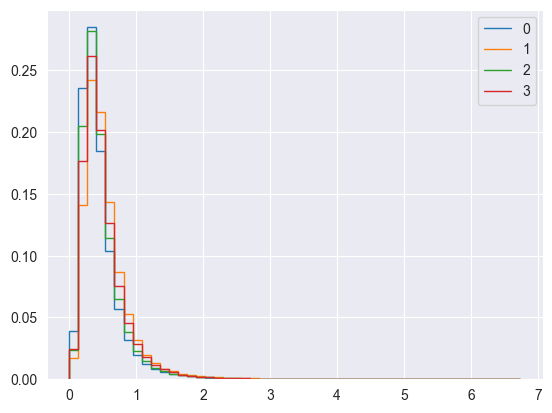

In [37]:
gdf_filter = gdf[(gdf['Phase Angle (theta)_median'] >= -1) & (gdf['Phase Angle (theta)_median'] <= 1.5)]
# gdf_filter = gdf.copy()
counts_list= []
legend=[]
for i in range(4):
    rga_level= gdf_filter[gdf_filter['NIVEAU'] == i]
    counts, bins = np.histogram(rga_level['Detrended Amplitude_median'], bins=50)
    counts_list.append(counts/len(rga_level))
    legend.append(i)

for counts in counts_list:
    plt.stairs(counts, bins)
    plt.legend(legend)


In [39]:
gdf.columns

Index(['grid_500m', 'Detrended Amplitude_median',
       'Detrended Amplitude_2016_median', 'Detrended Amplitude_2017_median',
       'Detrended Amplitude_2018_median', 'Detrended Amplitude_2019_median',
       'Detrended Amplitude_2020_median', 'Detrended Amplitude_2021_median',
       'Detrended Amplitude_winter_2015_median',
       'Detrended Amplitude_summer_2016_median',
       'Detrended Amplitude_winter_2016_median',
       'Detrended Amplitude_summer_2017_median',
       'Detrended Amplitude_winter_2017_median',
       'Detrended Amplitude_summer_2018_median',
       'Detrended Amplitude_winter_2018_median',
       'Detrended Amplitude_summer_2019_median',
       'Detrended Amplitude_winter_2019_median',
       'Detrended Amplitude_summer_2020_median',
       'Detrended Amplitude_winter_2020_median',
       'Detrended Amplitude_summer_2021_median', 'Phase Angle (theta)_median',
       'Detrended Amplitude winter_median',
       'Detrended Amplitude summer_median',
       'Detre

In [77]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset (You can use any dataset)
# Example using sklearn's Iris dataset

# Create a DataFrame for easy manipulation
columns = ['Detrended Amplitude_median', 'Phase Angle (theta)_median','Detrended Amplitude winter_median',
           'Detrended Amplitude summer_median','Detrended Amplitude summer-winter diff_median',
           'median_summer_winter_amplitude_diff']
# columns = ['Detrended Amplitude_2018_median', 'Detrended Amplitude_winter_2018_median',
#            'Detrended Amplitude_summer_2018_median', 'annual_mean_swi_2018',
#            'winter_mean_swi_2018', 'summer_mean_swi_2018', 'winter_summer_swi_diff_2018', 'NIVEAU']
df = gdf[columns].copy()
df = df[(df['Phase Angle (theta)_median'] >= -1) & (gdf['Phase Angle (theta)_median'] <= 1.5)]
# df = gdf.drop(['grid_500m', 'geometry'], axis=1)
# df = df.fillna(0)
# target = gdf['NIVEAU'].values

# Step 3: Standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 4: Apply PCA
pca = PCA(n_components=5)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(df_scaled)

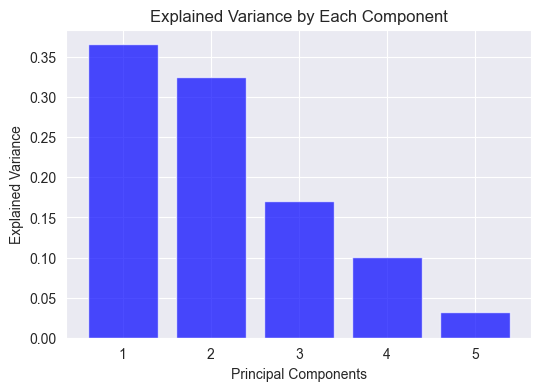

In [78]:
# Step 5: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# pca_df['Target'] = target

# Step 6: Plot the Explained Variance Ratio
plt.figure(figsize=(6,4))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, color='blue', alpha=0.7)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Each Component')
plt.show()

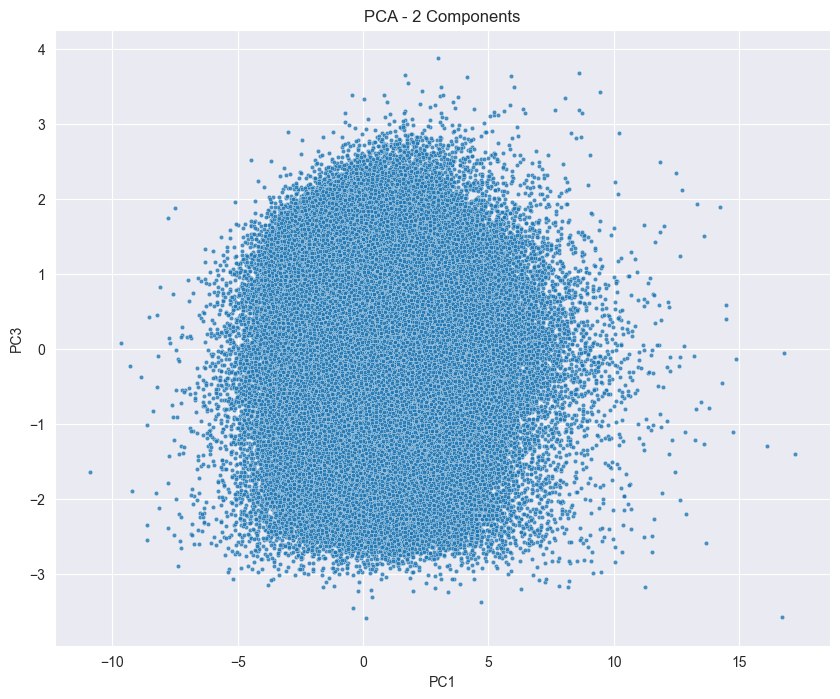

Explained variance ratios: [0.36568228 0.32487576 0.17012907 0.10036873 0.03193441]


In [83]:
# Step 7: Visualize PCA Result
fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(pca_df['PC1'], pca_df['PC3'], pca_df['PC4'],
#                 c=target, cmap='Set1', s=10, alpha=0.8)
sns.scatterplot(x='PC1', y='PC3',  data=pca_df, s=10, alpha=0.8) #hue=target, palette='Set1',
# ax.view_init(elev=70, azim=45)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
plt.title('PCA - 2 Components')
# fig.colorbar(sc)
plt.show()

# Step 8: (Optional) Print the Variance Ratios
print("Explained variance ratios:", pca.explained_variance_ratio_)

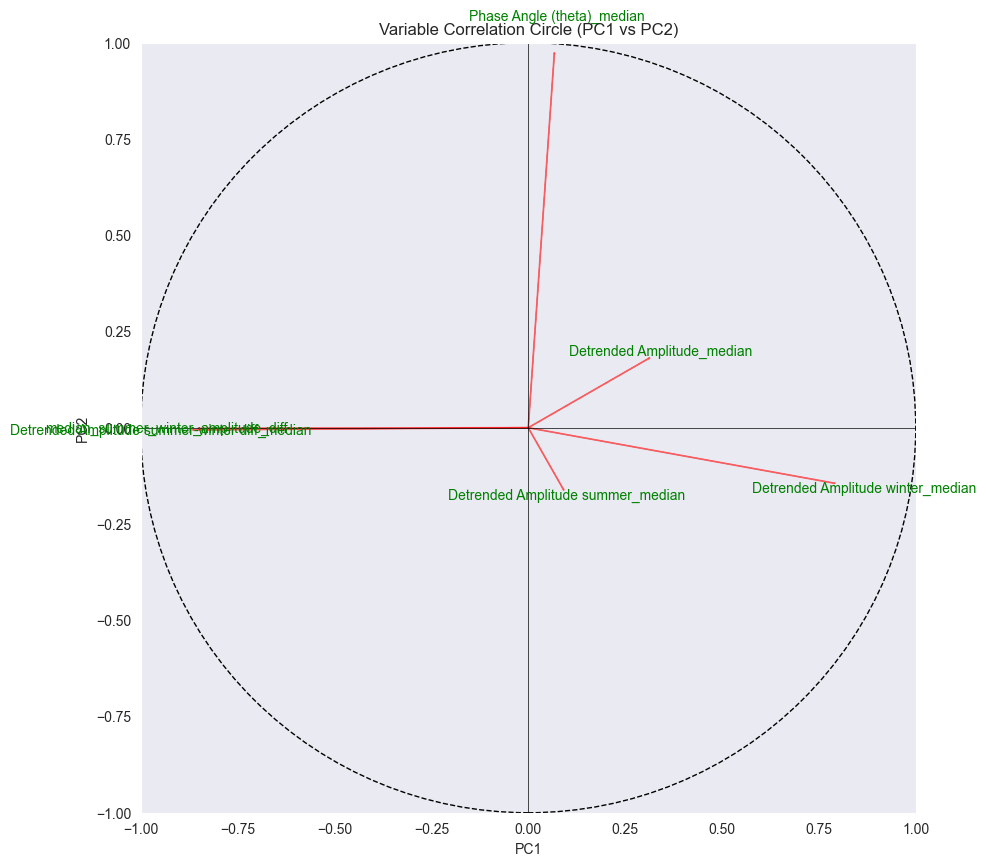

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_scaled is the standardized data, and pca is already fitted
components = pca.components_  # Get PCA components
n_pcs = pca.n_components_  # Number of principal components

# Step 1: Calculate the correlation between original variables and PCs
correlations = components.T * np.sqrt(pca.explained_variance_)

# Step 2: Plot the correlation circle
plt.figure(figsize=(10, 10))

# Plot unit circle
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Add each variable as a vector
for i, (var_name, coord) in enumerate(zip(df.columns, correlations)):
    plt.arrow(0, 0, coord[0], coord[2], color='r', alpha=0.5)
    plt.text(coord[0] * 1.1, coord[2] * 1.1, var_name,  color='g', ha='center', va='center')

# Formatting the plot
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Variable Correlation Circle (PC1 vs PC2)')
plt.grid()

plt.show()


In [81]:

# Get the explained variance for scaling
explained_variance = np.sqrt(pca.explained_variance_)

# Calculate the correlation of each variable with PC1
correlations_with_pc1 = components[0, :] * explained_variance[0]
correlations_with_pc2 = components[1, :] * explained_variance[1]
correlations_with_pc3 = components[2, :] * explained_variance[2]
correlations_with_pc4 = components[3, :] * explained_variance[3]
correlations_with_pc5 = components[4, :] * explained_variance[4]

# Create a DataFrame to store the variables and their correlations
correlation_df = pd.DataFrame({
    'Variable': df.columns,
    'Correlation_with_PC1': correlations_with_pc1,
    'Correlation_with_PC2': correlations_with_pc2,
    'Correlation_with_PC3': correlations_with_pc3,
    'Correlation_with_PC4': correlations_with_pc4,
    'Correlation_with_PC5': correlations_with_pc5
    
})

# Sort the DataFrame by the absolute correlation values in descending order
correlation_df['PC1_Abs_Correlation'] = correlation_df['Correlation_with_PC1'].abs()
correlation_df['PC2_Abs_Correlation'] = correlation_df['Correlation_with_PC2'].abs()
correlation_df['PC3_Abs_Correlation'] = correlation_df['Correlation_with_PC3'].abs()
correlation_df['PC4_Abs_Correlation'] = correlation_df['Correlation_with_PC4'].abs()
correlation_df['PC5_Abs_Correlation'] = correlation_df['Correlation_with_PC5'].abs()
# correlation_df_sorted = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display the ranked variables by correlation with PC1
correlation_df

,Variable,Correlation_with_PC1,Correlation_with_PC2,Correlation_with_PC3,Correlation_with_PC4,Correlation_with_PC5,PC1_Abs_Correlation,PC2_Abs_Correlation,PC3_Abs_Correlation,PC4_Abs_Correlation,PC5_Abs_Correlation
0,Detrended Amplitude_median,0.310492,0.674724,0.179711,0.645017,0.001224,0.310492,0.674724,0.179711,0.645017,0.001224
1,Phase Angle (theta)_median,0.067291,0.107737,0.970845,-0.203289,0.000517,0.067291,0.107737,0.970845,0.203289,0.000517
2,Detrended Amplitude winter_median,0.788053,0.522073,-0.143726,-0.248141,-0.080528,0.788053,0.522073,0.143726,0.248141,0.080528
3,Detrended Amplitude summer_median,0.090003,0.929372,-0.158896,-0.287103,0.071785,0.090003,0.929372,0.158896,0.287103,0.071785
4,Detrended Amplitude summer-winter diff_median,-0.862143,0.422429,-0.005684,-0.022823,0.262518,0.862143,0.422429,0.005684,0.022823,0.262518
5,median_summer_winter_amplitude_diff,-0.848967,0.409461,-0.001809,-0.017808,-0.333244,0.848967,0.409461,0.001809,0.017808,0.333244


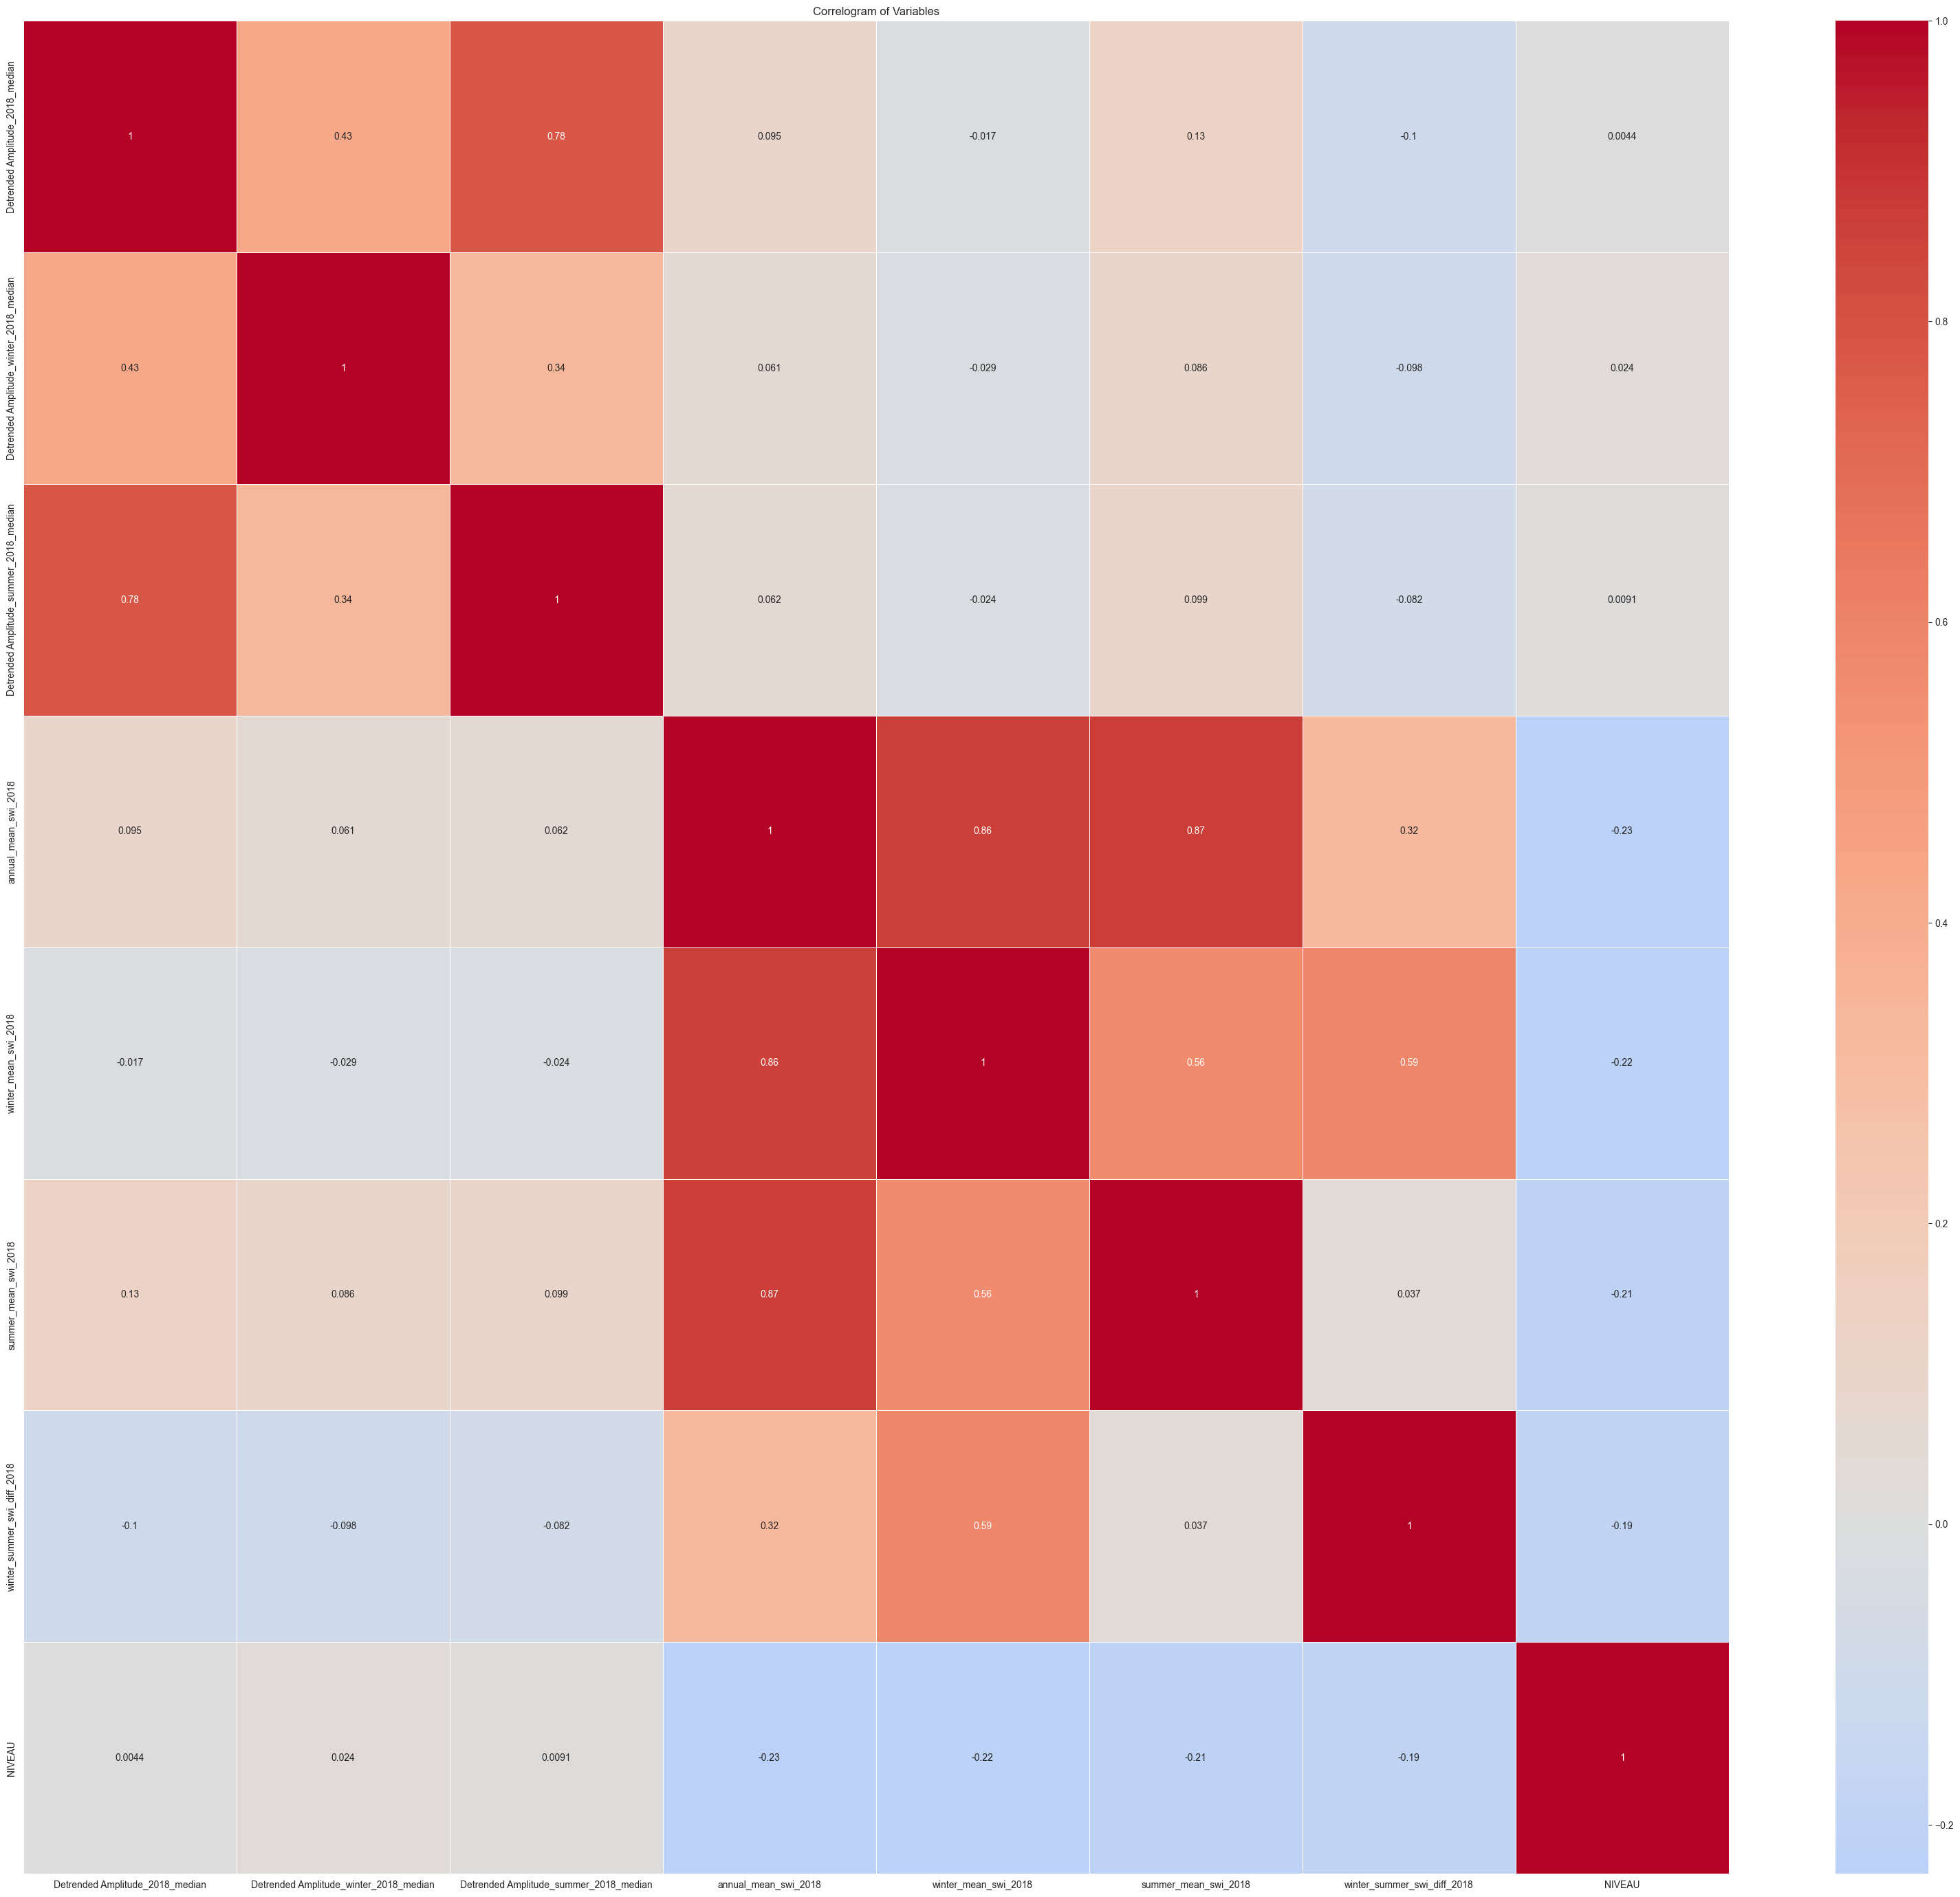

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Step 1: Calculate the correlation matrix
# df = gdf_enriched.drop(['grid_500m','geometry', 'Phase Angle (theta)_median'], axis=1).copy()
corr_matrix = df.corr()

# Step 2: Create a correlogram (heatmap)
plt.figure(figsize=(40, 35))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Step 3: Add plot formatting
plt.title('Correlogram of Variables')
plt.show()